##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic regression: Predict PTR ratios 


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/regression"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In a *regression* problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).


This example uses the `tf.keras` API, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [29]:
# Use seaborn for pairplot
# !pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

/Users/rubenweitzman/Virtualenvs/project1_env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


1.12.0


In [34]:
help("modules")


Please wait a moment while I gather a list of all available modules...



/Users/rubenweitzman/Virtualenvs/project1_env/lib/python3.7/site-packages/Bio/Align/substitution_matrices/__init__.py:21: BiopythonExperimentalWarning: Bio.Align.substitution_matrices is an experimental module which may still undergo significant changes. In particular, the location of this module may change, and the Array class defined in this module may be moved to other existing or new modules in Biopython.
  BiopythonExperimentalWarning)
/Users/rubenweitzman/Virtualenvs/project1_env/lib/python3.7/site-packages/Bio/KDTree/__init__.py:25: BiopythonDeprecationWarning: Bio.KDTree has been deprecated, and we intend to remove it in a future release of Biopython. Please use Bio.PDB.kdtrees instead, which is functionally very similar.
  BiopythonDeprecationWarning)
/Users/rubenweitzman/Virtualenvs/project1_env/lib/python3.7/site-packages/Bio/codonalign/__init__.py:27: BiopythonExperimentalWarning: Bio.codonalign is an experimental module which may undergo significant changes prior to its fu

Bio                 base64              jupyter_core        sched
BioSQL              bdb                 keras_applications  scipy
IPython             binascii            keras_preprocessing seaborn
PIL                 binhex              keyword             secrets
__future__          biocircuits         kiwisolver          select
_abc                bisect              lib2to3             selectors
_ast                bleach              linecache           send2trash
_asyncio            bokeh               llvmlite            setuptools
_bisect             builtins            locale              shelve
_blake2             bz2                 logging             shlex
_bootlocale         cProfile            louvain             shutil
_bz2                cachetools          lzma                signal
_codecs             caffe2              macpath             site
_codecs_cn          calendar            mailbox             six
_codecs_hk          certifi             mailcap          

/usr/local/Cellar/python/3.7.1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/pkgutil.py:107: VisibleDeprecationWarning:

zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    



In [35]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

ModuleNotFoundError: No module named 'tensorflow.compat.v2'

## The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).



### Get the data
First download the dataset.

Import it using pandas

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import requests, sys #to communicate with Ensembl servers
import json 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


newFrame=pd.read_csv('CodonTable.csv')

Frame=newFrame.iloc[:,4:].copy()
# 
# 
Frame = Frame.replace('NA', np.nan, regex=True)                    
                         
Frame =Frame.fillna(0)
Frame=Frame.apply(pd.to_numeric)
Frame['Brain_mRNA'].head(5)
CodonFrame=Frame.iloc[:,-(65 ):]
CodonFrame.head(3)
dataset=CodonFrame

### Clean the data

The dataset contains a few unknown values.

### Split the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [3]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

/Users/rubenweitzman/Virtualenvs/project1_env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


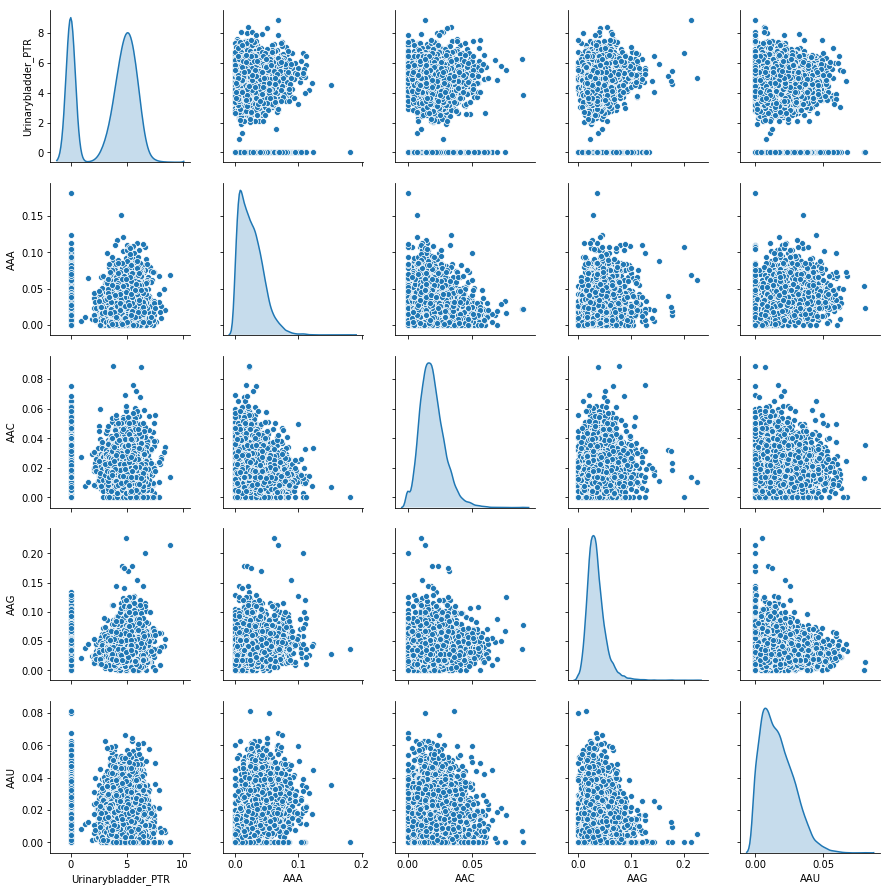

In [4]:
sns.pairplot(train_dataset.iloc[:,:5], diag_kind="kde")

Also look at the overall statistics:

In [8]:
train_stats = train_dataset.describe()

train_stats = train_stats.transpose()
train_stats.to_csv('summuraryStats.csv')
train_dataset

,Urinarybladder_PTR,AAA,AAC,AAG,AAU,ACA,ACC,ACG,ACU,AGA,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
1585,5.6612,0.000000,0.014331,0.044586,0.001592,0.007962,0.019108,0.009554,0.012739,0.004777,...,0.004777,0.012739,0.001592,0.009554,0.009554,0.000000,0.000000,0.015924,0.009554,0.003185
9105,3.5950,0.037578,0.010438,0.020877,0.027140,0.008351,0.012526,0.002088,0.018789,0.012526,...,0.004175,0.014614,0.000000,0.004175,0.012526,0.010438,0.020877,0.035491,0.022965,0.035491
2916,4.7034,0.030503,0.018810,0.029995,0.021861,0.017285,0.012710,0.003050,0.012710,0.013726,...,0.006101,0.018810,0.000000,0.005592,0.011185,0.010676,0.011693,0.018302,0.017285,0.029487
1516,6.5686,0.020833,0.028409,0.035985,0.034091,0.013258,0.009470,0.000000,0.022727,0.009470,...,0.001894,0.013258,0.001894,0.003788,0.011364,0.003788,0.001894,0.028409,0.005682,0.032197
9113,0.0000,0.015534,0.021359,0.015534,0.011650,0.015534,0.019417,0.005825,0.007767,0.005825,...,0.011650,0.007767,0.001942,0.009709,0.009709,0.009709,0.003883,0.021359,0.007767,0.031068
8902,5.2432,0.029333,0.018667,0.053333,0.021333,0.021333,0.008000,0.005333,0.024000,0.024000,...,0.000000,0.013333,0.000000,0.010667,0.008000,0.016000,0.010667,0.042667,0.016000,0.032000
2495,4.9040,0.018248,0.003650,0.029197,0.018248,0.014599,0.014599,0.000000,0.018248,0.010949,...,0.003650,0.021898,0.000000,0.007299,0.000000,0.018248,0.014599,0.007299,0.021898,0.025547
4209,0.0000,0.000000,0.014493,0.000000,0.000000,0.004831,0.028986,0.009662,0.004831,0.000000,...,0.009662,0.000000,0.004831,0.043478,0.019324,0.004831,0.004831,0.004831,0.004831,0.000000
2869,5.2074,0.054054,0.007207,0.041441,0.012613,0.023423,0.010811,0.005405,0.018018,0.025225,...,0.001802,0.009009,0.001802,0.007207,0.019820,0.003604,0.010811,0.010811,0.019820,0.010811
5927,0.0000,0.006766,0.024357,0.027064,0.006766,0.008119,0.024357,0.008119,0.002706,0.004060,...,0.009472,0.006766,0.001353,0.027064,0.013532,0.010825,0.000000,0.027064,0.001353,0.006766


### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [6]:
train_labels = train_dataset.pop('Liver_PTR')
test_labels = test_dataset.pop('Liver_PTR')


KeyError: 'Liver_PTR'

### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [82]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data
train_dataset

,AAA,AAC,AAG,AAU,ACA,ACC,ACG,ACU,AGA,AGC,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
1585,-1.369723,-0.508591,0.582859,-1.288720,-0.737839,0.114767,0.639556,0.043377,-0.711079,-0.132270,...,0.030541,-0.121707,0.122314,-0.185476,-0.315719,-1.083249,-0.939860,-0.338769,-0.408406,-1.249598
9105,0.659874,-0.913232,-0.783452,0.884426,-0.693071,-0.550671,-0.755038,0.786120,0.091411,-0.015760,...,-0.092253,0.085993,-0.643713,-0.653912,0.045816,0.121431,1.720896,1.332166,1.314275,1.653900
2916,0.277756,-0.043000,-0.257995,0.435364,0.335292,-0.532108,-0.575233,0.039799,0.215724,0.172269,...,0.300655,0.550884,-0.643713,-0.530514,-0.117382,0.148869,0.550407,-0.135663,0.584718,1.114283
1516,-0.244518,0.954748,0.087193,1.475701,-0.128290,-0.859663,-1.144977,1.269571,-0.225110,-0.348633,...,-0.557839,-0.064244,0.267395,-0.687658,-0.095596,-0.646096,-0.698477,0.727437,-0.905840,1.357884
9113,-0.530735,0.221943,-1.091350,-0.433146,0.133725,0.146025,-0.056932,-0.566977,-0.602530,-0.313634,...,1.433245,-0.672480,0.290394,-0.172012,-0.296913,0.037221,-0.444908,0.125411,-0.637981,1.256414
8902,0.214566,-0.057938,1.086952,0.390505,0.801234,-1.008245,-0.148811,1.425813,1.279650,-0.515011,...,-0.944349,-0.055852,-0.643713,-0.088586,-0.504779,0.763285,0.419609,1.944968,0.419622,1.340182
2495,-0.384142,-1.618898,-0.303973,0.128072,0.026055,-0.341154,-1.144977,0.719710,-0.071923,-1.401149,...,-0.199543,0.892904,-0.643713,-0.381852,-1.477972,1.022743,0.920727,-1.075244,1.177248,0.760257
4209,-1.369723,-0.491799,-1.986543,-1.424170,-1.098203,1.113322,0.659671,-0.927414,-1.205793,-0.408915,...,1.027408,-1.532892,1.680273,2.768971,0.872735,-0.525721,-0.324158,-1.286030,-1.015145,-1.535825
2869,1.549728,-1.249103,0.401645,-0.351305,1.041804,-0.724081,-0.135350,0.691455,1.406535,-0.416084,...,-0.576643,-0.534892,0.223071,-0.389870,0.933091,-0.667363,0.437980,-0.775374,0.910311,-0.564201
5927,-1.004298,0.533575,-0.426921,-0.848643,-0.719734,0.645419,0.371513,-1.188228,-0.785386,0.989075,...,0.988720,-0.783379,0.007255,1.339420,0.168159,0.166097,-0.939860,0.612538,-1.461892,-0.927739


,AAA,AAC,AAG,AAU,ACA,ACC,ACG,ACU,AGA,AGC,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
1585,0.000000,0.014331,0.044586,0.001592,0.007962,0.019108,0.009554,0.012739,0.004777,0.017516,...,0.004777,0.012739,0.001592,0.009554,0.009554,0.000000,0.000000,0.015924,0.009554,0.003185
9105,0.037578,0.010438,0.020877,0.027140,0.008351,0.012526,0.002088,0.018789,0.012526,0.018789,...,0.004175,0.014614,0.000000,0.004175,0.012526,0.010438,0.020877,0.035491,0.022965,0.035491
2916,0.030503,0.018810,0.029995,0.021861,0.017285,0.012710,0.003050,0.012710,0.013726,0.020844,...,0.006101,0.018810,0.000000,0.005592,0.011185,0.010676,0.011693,0.018302,0.017285,0.029487
1516,0.020833,0.028409,0.035985,0.034091,0.013258,0.009470,0.000000,0.022727,0.009470,0.015152,...,0.001894,0.013258,0.001894,0.003788,0.011364,0.003788,0.001894,0.028409,0.005682,0.032197
9113,0.015534,0.021359,0.015534,0.011650,0.015534,0.019417,0.005825,0.007767,0.005825,0.015534,...,0.011650,0.007767,0.001942,0.009709,0.009709,0.009709,0.003883,0.021359,0.007767,0.031068
8902,0.029333,0.018667,0.053333,0.021333,0.021333,0.008000,0.005333,0.024000,0.024000,0.013333,...,0.000000,0.013333,0.000000,0.010667,0.008000,0.016000,0.010667,0.042667,0.016000,0.032000
2495,0.018248,0.003650,0.029197,0.018248,0.014599,0.014599,0.000000,0.018248,0.010949,0.003650,...,0.003650,0.021898,0.000000,0.007299,0.000000,0.018248,0.014599,0.007299,0.021898,0.025547
4209,0.000000,0.014493,0.000000,0.000000,0.004831,0.028986,0.009662,0.004831,0.000000,0.014493,...,0.009662,0.000000,0.004831,0.043478,0.019324,0.004831,0.004831,0.004831,0.004831,0.000000
2869,0.054054,0.007207,0.041441,0.012613,0.023423,0.010811,0.005405,0.018018,0.025225,0.014414,...,0.001802,0.009009,0.001802,0.007207,0.019820,0.003604,0.010811,0.010811,0.019820,0.010811
5927,0.006766,0.024357,0.027064,0.006766,0.008119,0.024357,0.008119,0.002706,0.004060,0.029770,...,0.009472,0.006766,0.001353,0.027064,0.013532,0.010825,0.000000,0.027064,0.001353,0.006766


This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.  That includes the test set as well as live data when the model is used in production.

## The model

### Build the model

Let's build our model. Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [83]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [84]:
model = build_model()

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________



Now try out the model. Take a batch of `10` examples from the training data and call `model.predict` on it.

In [86]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 1.4541368 ],
       [-0.6826973 ],
       [-0.14187367],
       [ 0.48489875],
       [ 0.17127985],
       [-0.29484347],
       [-0.11174154],
       [ 0.94729733],
       [-0.17636171],
       [ 0.9274484 ]], dtype=float32)

It seems to be working, and it produces a result of the expected shape and type.

### Train the model

Train the model for 5000 epochs, and record the training and validation accuracy in the `history` object.

In [87]:
EPOCHS = 5000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

Visualize the model's training progress using the stats stored in the `history` object.

In [88]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,13.379909,2.858829,13.379909,0.166051,0.314312,0.166051,995
996,13.386469,2.856201,13.386469,0.161742,0.308030,0.161742,996
997,13.383463,2.858790,13.383463,0.159107,0.308545,0.159107,997
998,13.556131,2.874228,13.556131,0.164029,0.314726,0.164029,998
999,13.399860,2.861340,13.399860,0.165771,0.315440,0.165771,999


In [63]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [64]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

KeyError: 'mae'

Text(0, 0.5, 'MSE [MPG^2]')

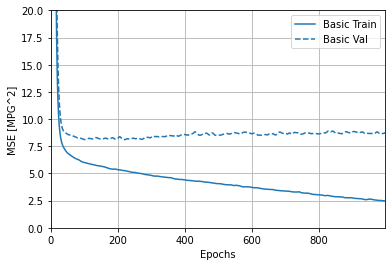

In [26]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve. We'll use an *EarlyStopping callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping).

In [89]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0)

Text(0, 0.5, 'MAE [MPG]')

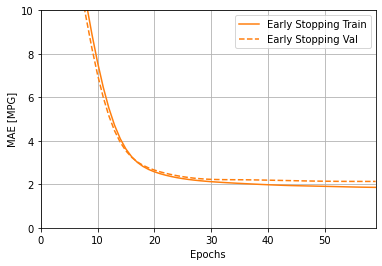

In [28]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

The graph shows that on the validation set, the average error is usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.  This tells us how well we can expect the model to predict when we use it in the real world.

In [90]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  2.89 MPG


### Make predictions

Finally, predict MPG values using data in the testing set:

-1.36014359855792


Text(0.5, 0, 'True Values [MPG]')

Text(0, 0.5, 'Predictions [MPG]')

(0, 50)

(0, 50)

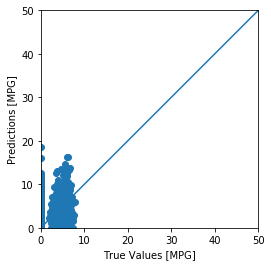

In [91]:
test_predictions = model.predict(normed_test_data).flatten()

from sklearn.metrics import r2_score
score=r2_score(test_labels,test_predictions)
print(score)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

(array([  1.,   2.,   1.,   3.,   8.,  19.,  42.,  72., 133., 239., 360.,
        383., 320., 266., 216., 114.,  75.,  30.,  15.,   9.,   5.,   0.,
          0.,   1.,   1.]),
 array([-16.71954691, -15.3084396 , -13.89733228, -12.48622497,
        -11.07511765,  -9.66401033,  -8.25290302,  -6.8417957 ,
         -5.43068839,  -4.01958107,  -2.60847375,  -1.19736644,
          0.21374088,   1.62484819,   3.03595551,   4.44706283,
          5.85817014,   7.26927746,   8.68038477,  10.09149209,
         11.50259941,  12.91370672,  14.32481404,  15.73592135,
         17.14702867,  18.55813599]),
 <a list of 25 Patch objects>)

Text(0.5, 0, 'Prediction Error [MPG]')

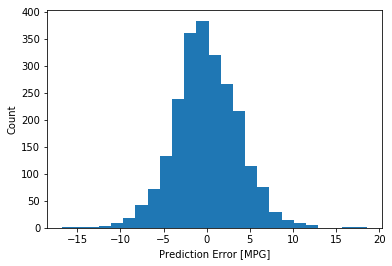

In [92]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

It's not quite gaussian, but we might expect that because the number of samples is very small.

## Conclusion

This notebook introduced a few techniques to handle a regression problem.

* Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
* Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
* Early stopping is a useful technique to prevent overfitting.